# Implementing Adaline Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Loading Iris Data set

In [2]:
column = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('iris.data', names = column, header = None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


For easiness of using data we will select 2 features, one is sepal length and one is petal length and 2 classes only

In [4]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,-1].values

In [5]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [6]:
y = np.where(y == 'Iris-setosa',1,-1)

# Model 

Adaline is a improvement on perceptron, it uses activation function to update weight rather than the threshold function, Adaline improves over unit function in a way that it uses cost function which is differentiable and optimizable because the cost function use is convex.

In [7]:
class Adaline:
    
    def __init__(self, epoch = 50, learning_rate = 0.001, random_state = 42):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.random_state = random_state
        
    def fit(self,X,y):
        random = np.random.RandomState(self.random_state)
        self.w_ = random.normal(loc = 0.0, scale = 0.001, size = 1 + X.shape[1])
        
        self.costs_ = [] #it will store cost function for every epoch
        
        for _ in range(self.epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input) #in that case our activation function will be an identity function
            errors = (y - output)
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.costs_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def activation(self,X):
        return X        #identity function f(x) = x
    
    

# Training our model

we will use two learning rate 0.01, and 0.0001, learning rate finding is quite experimental.

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

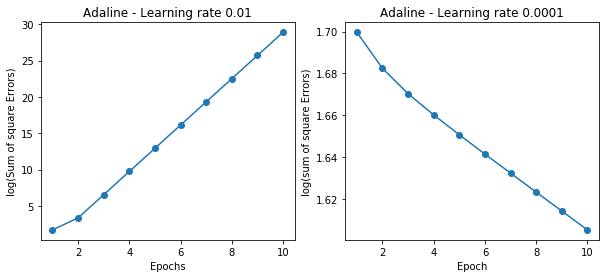

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2 , figsize = (10,4))
ada1 = Adaline(learning_rate=0.01, epoch = 10).fit(X,y)
ax[0].plot(range(1,len(ada1.costs_)+1), np.log10(ada1.costs_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum of square Errors)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = Adaline(learning_rate = 0.0001, epoch = 10).fit(X,y)
ax[1].plot(range(1,len(ada2.costs_)+1), np.log10(ada2.costs_), marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('log(sum of square Errors)')
ax[1].set_title('Adaline - Learning rate 0.0001')


you can observe that in learning_rate 0.01 our errors become large, that is because we overshoot our global minimum values that's why learning_rate should be carefully choosen

# Decision Plot

In [9]:
def decision_plot(X, y, classifier, resolution = 0.02):
    
    color = ('red','green','blue','sky','violet','pink')
    markers = ('^','v','s','o','*')
    cmap = ListedColormap(color[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, cmap = cmap, alpha = 0.7)
    
    for ix , cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0], y = X[y==cl,1], label = cl, edgecolor = 'black', marker = markers[ix], color = color[ix])
    
    plt.legend(loc = 'upper left')
        
        
    

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

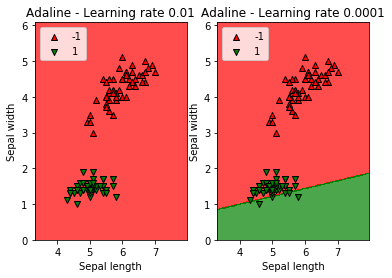

In [10]:
plt.subplot(1,2,1)
decision_plot(X,y,ada1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Adaline - Learning rate 0.01')

plt.subplot(1,2,2)
decision_plot(X,y,ada2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Adaline - Learning rate 0.0001')

you can observe how bad the model1 works it was not able to classify our data set at all in its classes


In [11]:
ada3 = Adaline(epoch=50, learning_rate=0.0001).fit(X,y)

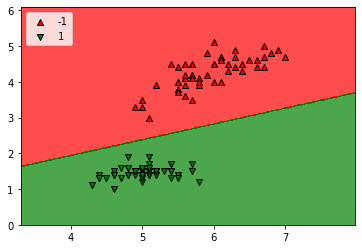

In [12]:
decision_plot(X,y, ada3)

As you can conclude working on learning rate and epoch help in making our model perform better on the data

# Feature Scaling

Feature Scaling help Gradient Descent model to converge quickly. we will use Standard Scaler Scaling here

X_new = X - mean / std

In [13]:
X_new = np.copy(X)

X_new[:,0] = X[:,0] - X[:,0].mean() / X[:,0].std()
X_new[:,1] = X[:,1] - X[:,1].mean() / X[:,1].std()

In [14]:
ada_scale_1 = Adaline(learning_rate=0.001, epoch= 100).fit(X_new,y)
ada_scale_2 = Adaline(learning_rate=0.0001, epoch = 10).fit(X_new,y)

# Decision Boundary Plot 

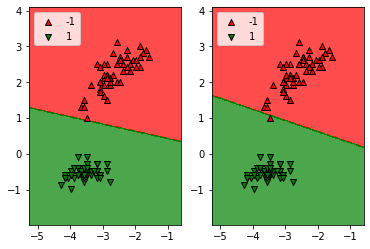

In [15]:
plt.subplot(1,2,1)
decision_plot(X_new,y,ada_scale_1)

plt.subplot(1,2,2)
decision_plot(X_new, y, ada_scale_2)

# Stochastic Gradient Descent

If our data set is too large doing <b>Batch Gradient Descent</b> will be costly. A popular alternative is <b>Stochastic Gradient Descent algorithm</b>, also called as <b><i>iterative or online gradient descent</i></b>. Instead of updating the weights based on the sum of the accumulated errors over all samples :

learning_rate * (y(i) - phi(z(i))) x(i)

Stochastic Gradient Descent reaches convergence much faster because of the more frequent weight update. Since each gradient is calculated based on a single training example, the error surface is noisier than in gradient descent, which can also have the advantage of stochastic gradient descent can escape shallow local minima more readily if we are working with nonlinear cost functions.

** To obtain satisfying results via stochastic gradient descent, it is important to prescent it training data in a random order, also, we want to shuffle the training set for every epoch to prevent cycles.

Another advantage of stochastic gradient descent is that we can use it for <b>online learning.</b> In online learning, our model is trained on the fly as new training data arrives.

# Building Adaline Model with Stochastic Gradient Descent

In [21]:
class AdalineSGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self,m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
        
    def _update_weights(self,xi,target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [24]:
ada = AdalineSGD(n_iter=15, eta = 0.01, random_state=1)
ada.fit(X_new,y)

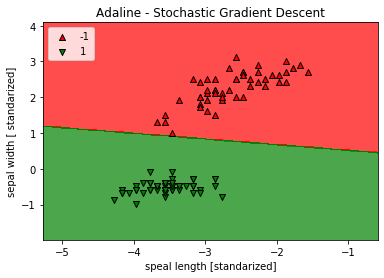

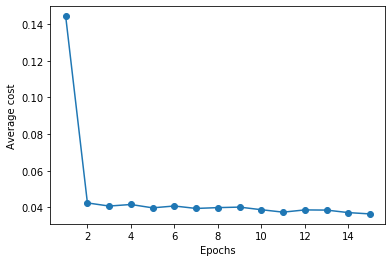

In [25]:
decision_plot(X_new, y , ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('speal length [standarized]')
plt.ylabel('sepal width [ standarized]')
plt.show()

plt.plot(range(1,len(ada.cost_)+ 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.show()